# Exploratory data analysis 

In [1]:
#pietro
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#jenna
import statsmodels.formula.api as smf

#edo
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
file_path = 'imdb_movies.csv'
# Try loading the CSV file with a different encoding
imdb_movies = pd.read_csv(file_path)

# Display the first few rows of the dataframe
imdb_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [3]:
imdb_movies.dtypes

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object

In [4]:
imdb_movies["date_x"]= pd.to_datetime(imdb_movies["date_x"])
imdb_movies.dtypes

names                 object
date_x        datetime64[ns]
score                float64
genre                 object
overview              object
crew                  object
orig_title            object
status                object
orig_lang             object
budget_x             float64
revenue              float64
country               object
dtype: object

In [5]:
imdb_movies.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [6]:
imdb_movies.dropna(inplace=True)
imdb_movies.isna().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [7]:
#check for duplicates 
print(imdb_movies.duplicated().sum())

0


no duplicates

In [8]:
imdb_movies.rename(columns={'date_x': 'release_date',
                            'budget_x': 'budget'},
                            inplace=True)

In [9]:
imdb_movies['profitable'] = (imdb_movies['revenue'] > imdb_movies['budget'])
imdb_movies['profitable'] = imdb_movies['profitable'].apply(lambda x: int(x))
imdb_movies.head()

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,1
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,1
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,1
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,1
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,1


In [10]:
imdb_movies.describe()

,release_date,score,budget,revenue,profitable
count,10052,10052.00000,1.005200e+04,1.005200e+04,10052.000000
mean,2008-06-07 16:17:25.762037504,63.82700,6.412528e+07,2.512049e+08,0.802129
min,1903-05-15 00:00:00,0.00000,1.000000e+00,0.000000e+00,0.000000
25%,2002-01-08 06:00:00,59.00000,1.439763e+07,2.768781e+07,1.000000
50%,2013-04-10 00:00:00,65.00000,5.000000e+07,1.493288e+08,1.000000
75%,2019-09-26 00:00:00,71.00000,1.040000e+08,4.161578e+08,1.000000
max,2023-12-31 00:00:00,100.00000,4.600000e+08,2.923706e+09,1.000000
std,NaN,12.78271,5.665852e+07,2.765495e+08,0.398414


looking the minimum values of our variables:
- score = 0 has no significance for our analysis, 
- budget < 1000 we will assume that is a problem of data qulity, therefore we drop these values
- revenue < 1000 we make the same assumption as for budget

In [11]:
#printing the count of values that are below a certain threshold
print(imdb_movies[imdb_movies['score'] == 0].count())
print(imdb_movies[imdb_movies['revenue'] < 1000].count())
print(imdb_movies[imdb_movies['budget'] < 1000].count())


names           163
release_date    163
score           163
genre           163
overview        163
crew            163
orig_title      163
status          163
orig_lang       163
budget          163
revenue         163
country         163
profitable      163
dtype: int64
names           85
release_date    85
score           85
genre           85
overview        85
crew            85
orig_title      85
status          85
orig_lang       85
budget          85
revenue         85
country         85
profitable      85
dtype: int64
names           19
release_date    19
score           19
genre           19
overview        19
crew            19
orig_title      19
status          19
orig_lang       19
budget          19
revenue         19
country         19
profitable      19
dtype: int64


In [12]:
imdb_movies = imdb_movies[imdb_movies.score != 0]
imdb_movies = imdb_movies[imdb_movies.revenue >= 1000]
imdb_movies = imdb_movies[imdb_movies.budget >= 1000]
imdb_movies.describe()

,release_date,score,budget,revenue,profitable
count,9793,9793.000000,9.793000e+03,9.793000e+03,9793.000000
mean,2008-03-16 13:10:56.918206976,64.889717,6.243951e+07,2.551389e+08,0.817421
min,1903-05-15 00:00:00,10.000000,2.000000e+03,1.242000e+03,0.000000
25%,2001-10-19 00:00:00,60.000000,1.450000e+07,2.892019e+07,1.000000
50%,2012-12-06 00:00:00,66.000000,5.000000e+07,1.470804e+08,1.000000
75%,2019-06-28 00:00:00,72.000000,1.020000e+08,4.257325e+08,1.000000
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09,1.000000
std,NaN,9.884499,5.421382e+07,2.787525e+08,0.386341


we dropped roughly 300 rows out of the original 10,000

Text(0.5, 1.0, 'Number of movies produced by the top 10 countries')

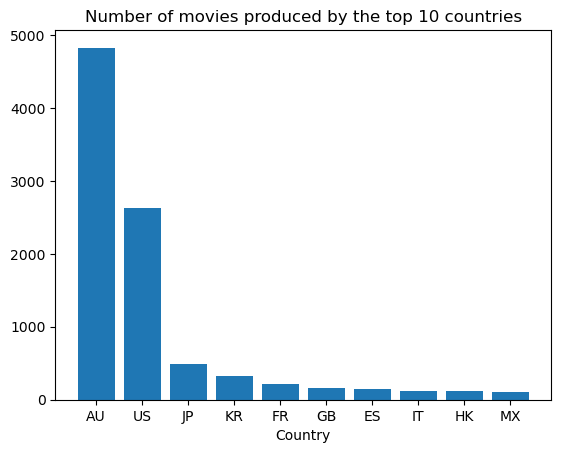

In [13]:
country = imdb_movies['country'].value_counts().head(10)
plt.bar(x=country.index, height=country)
plt.xlabel('Country')
plt.title('Number of movies produced by the top 10 countries')

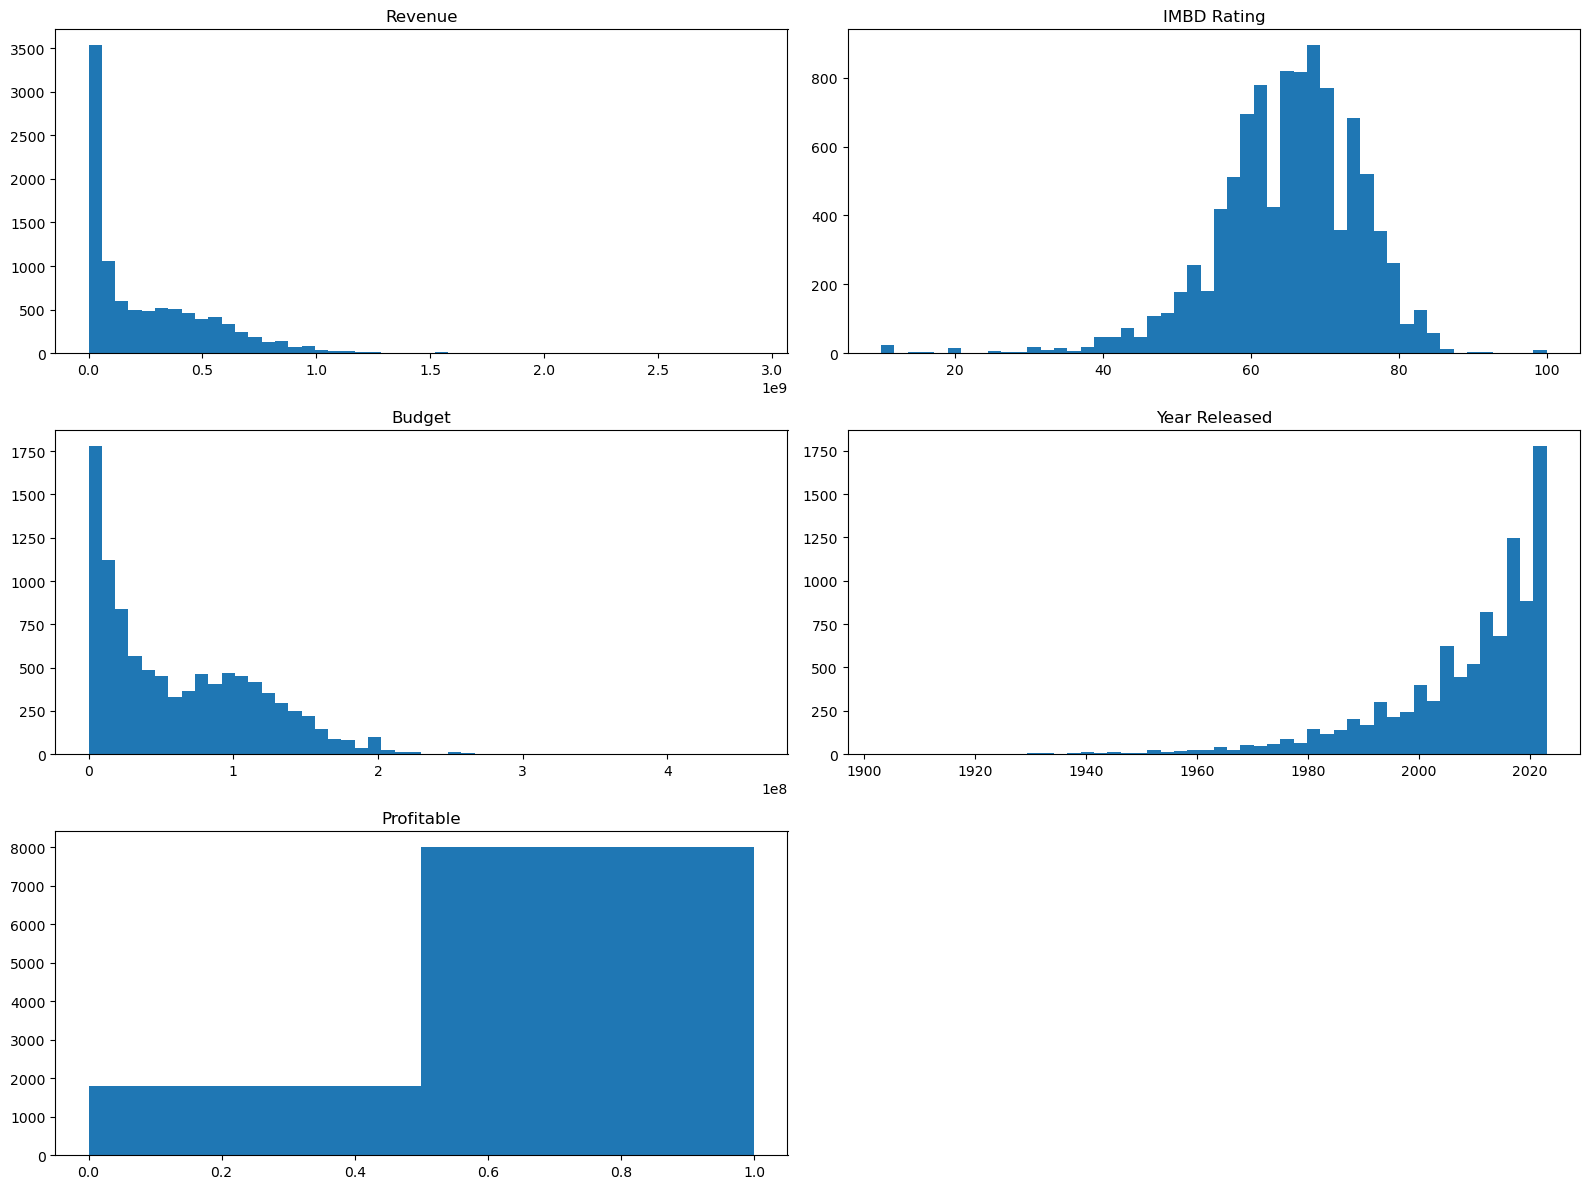

In [14]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(16, 12))
his1= imdb_movies['score']
his2= imdb_movies['budget']
his3= imdb_movies['revenue']
his4= imdb_movies['release_date'].dt.year
his5= imdb_movies['profitable']

axes[0,0].hist(his3, bins=50)
axes[0,0].set_title('Revenue')
axes[0,1].hist(his1, bins=50)
axes[0,1].set_title('IMBD Rating')
axes[1,0].hist(his2, bins=50)
axes[1,0].set_title('Budget')
axes[1,1].hist(his4, bins=50)
axes[1,1].set_title('Year Released')
axes[2,0].hist(his5, bins=2)
axes[2,0].set_title('Profitable')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

## genre analysis

In [15]:

imdb_genres = imdb_movies[['names', 'genre', 'budget']]
imdb_genres['genre'] = imdb_genres['genre'].str.split(r',\s*')
imdb_genres = imdb_genres.explode('genre').reset_index(drop=True)
imdb_genres

/var/folders/57/8yr9qn3s45sc5vk_srfp2yv80000gn/T/ipykernel_8090/2272670403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres['genre'] = imdb_genres['genre'].str.split(r',\s*')


,names,genre,budget
0,Creed III,Drama,75000000.0
1,Creed III,Action,75000000.0
2,Avatar: The Way of Water,Science Fiction,460000000.0
3,Avatar: The Way of Water,Adventure,460000000.0
4,Avatar: The Way of Water,Action,460000000.0
...,...,...,...
25683,Darkman II: The Return of Durant,Thriller,116000000.0
25684,Darkman II: The Return of Durant,Horror,116000000.0
25685,The Swan Princess: A Royal Wedding,Animation,92400000.0
25686,The Swan Princess: A Royal Wedding,Family,92400000.0


In [16]:
imdb_genres.groupby('genre')['budget'].agg(['max', 'min', 'mean'])

,max,min,mean
genre,,,
Action,460000000.0,7225.0,6.957201e+07
Adventure,460000000.0,5985.0,7.890800e+07
Animation,260000000.0,10540.0,8.639413e+07
Comedy,254000000.0,5000.0,6.081332e+07
Crime,250000000.0,7225.0,5.103134e+07
Documentary,264000000.0,400000.0,8.796915e+07
Drama,260000000.0,2000.0,5.521593e+07
Family,260000000.0,17300.0,7.897658e+07
Fantasy,379000000.0,7500.0,7.680222e+07


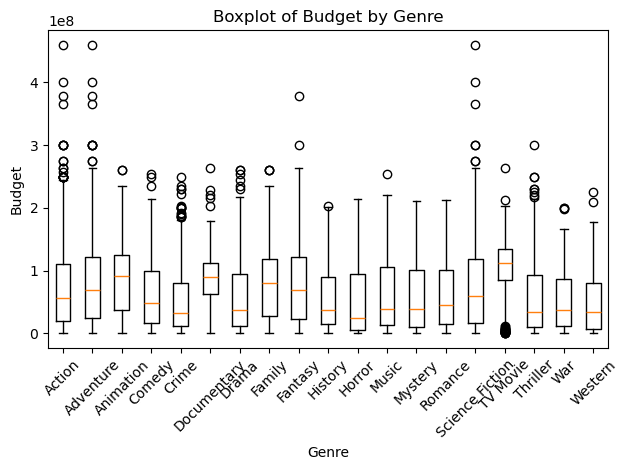

In [17]:

#boxplot 

#data preparation for boxplot
grouped_genres = imdb_genres.groupby('genre')['budget'].apply(list) 
genres_list = grouped_genres.index.tolist()
genres_data_to_plot = [grouped_genres[genre] for genre in genres_list]

#boxplot preparation
fig, ax = plt.subplots()
ax.boxplot(genres_data_to_plot, labels=genres_list)
ax.set_xlabel('Genre')
ax.set_ylabel('Budget')
ax.set_title('Boxplot of Budget by Genre')
plt.xticks(rotation = 45)
plt.tight_layout()


# Method 2
does imdb score influence if a movie is profitable or not?

In [18]:
logit_model = smf.logit('profitable ~ score + budget', data= imdb_movies)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.431910
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             profitable   No. Observations:                 9793
Model:                          Logit   Df Residuals:                     9790
Method:                           MLE   Df Model:                            2
Date:                Tue, 08 Oct 2024   Pseudo R-squ.:                 0.09126
Time:                        13:49:48   Log-Likelihood:                -4229.7
converged:                       True   LL-Null:                       -4654.4
Covariance Type:            nonrobust   LLR p-value:                3.446e-185
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1145      0.183     -6.096      0.000      -1.473      -0.756
score          0.0278      0.

In [19]:

imdb_movies.reset_index()
# clearing genre to create dummy_variables

# Replace NaN or None values with empty strings
imdb_movies['genre'] = imdb_movies['genre'].fillna('')

# Remove leading/trailing whitespaces
imdb_movies['genre'] = imdb_movies['genre'].str.strip()

# Replace multiple spaces with a single space
imdb_movies['genre'] = imdb_movies['genre'].str.replace(r'\s+', ' ', regex=True)

# Remove spaces around commas
imdb_movies['genre'] = imdb_movies['genre'].str.replace(r',\s*', ',', regex=True)

#replacing spaces with underscores
imdb_movies['genre'] = imdb_movies['genre'].str.replace(' ', '_')

# Split the 'genre' strings into lists
imdb_movies['genre'] = imdb_movies['genre'].str.split(',')

# Strip whitespace from each genre in the list
imdb_movies['genre'] = imdb_movies['genre'].apply(lambda genres: [genre.strip() for genre in genres if genre])




In [20]:
imdb_movies['main_genre'] = imdb_movies['genre'].apply(lambda x: x[0])
imdb_movies

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable,main_genre
0,Creed III,2023-03-02,73.0,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,1,Drama
1,Avatar: The Way of Water,2022-12-15,78.0,"[Science_Fiction, Adventure, Action]",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,1,Science_Fiction
2,The Super Mario Bros. Movie,2023-04-05,76.0,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,1,Animation
3,Mummies,2023-01-05,70.0,"[Animation, Comedy, Family, Adventure, Fantasy]","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,1,Animation
4,Supercell,2023-03-17,61.0,[Action],Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,1,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,[Drama],"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US,1,Drama
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,[Action],When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US,0,Action
10175,The Russia House,1990-12-21,61.0,"[Drama, Thriller, Romance]","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US,1,Drama
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"[Action, Adventure, Science_Fiction, Thriller,...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US,1,Action


In [21]:
main_genre_dummies = pd.get_dummies(imdb_movies, columns=['main_genre'])
main_genre_dummies.head()

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,...,main_genre_History,main_genre_Horror,main_genre_Music,main_genre_Mystery,main_genre_Romance,main_genre_Science_Fiction,main_genre_TV_Movie,main_genre_Thriller,main_genre_War,main_genre_Western
0,Creed III,2023-03-02,73.0,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,...,False,False,False,False,False,False,False,False,False,False
1,Avatar: The Way of Water,2022-12-15,78.0,"[Science_Fiction, Adventure, Action]",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,...,False,False,False,False,False,True,False,False,False,False
2,The Super Mario Bros. Movie,2023-04-05,76.0,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,...,False,False,False,False,False,False,False,False,False,False
3,Mummies,2023-01-05,70.0,"[Animation, Comedy, Family, Adventure, Fantasy]","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,...,False,False,False,False,False,False,False,False,False,False
4,Supercell,2023-03-17,61.0,[Action],Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,...,False,False,False,False,False,False,False,False,False,False


In [24]:
main_genre_dummies.columns

Index(['names', 'release_date', 'score', 'genre', 'overview', 'crew',
       'orig_title', 'status', 'orig_lang', 'budget', 'revenue', 'country',
       'profitable', 'main_genre_Action', 'main_genre_Adventure',
       'main_genre_Animation', 'main_genre_Comedy', 'main_genre_Crime',
       'main_genre_Documentary', 'main_genre_Drama', 'main_genre_Family',
       'main_genre_Fantasy', 'main_genre_History', 'main_genre_Horror',
       'main_genre_Music', 'main_genre_Mystery', 'main_genre_Romance',
       'main_genre_Science_Fiction', 'main_genre_TV_Movie',
       'main_genre_Thriller', 'main_genre_War', 'main_genre_Western'],
      dtype='object')

In [25]:
logit_formula_string = "profitable ~ score + budget"

for genre in main_genre_dummies.columns[14:]:
    logit_formula_string += f" + {genre}"
    
logit_formula_string

logit_model = smf.logit(logit_formula_string, data= main_genre_dummies)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.423560
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             profitable   No. Observations:                 9793
Model:                          Logit   Df Residuals:                     9772
Method:                           MLE   Df Model:                           20
Date:                Tue, 08 Oct 2024   Pseudo R-squ.:                  0.1088
Time:                        13:52:05   Log-Likelihood:                -4147.9
converged:                       True   LL-Null:                       -4654.4
Covariance Type:            nonrobust   LLR p-value:                6.510e-202
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.8395      0.202    